In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/akasa/Downloads/diabetes.csv',index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


Text(0.5, 1.0, 'Diabetes')

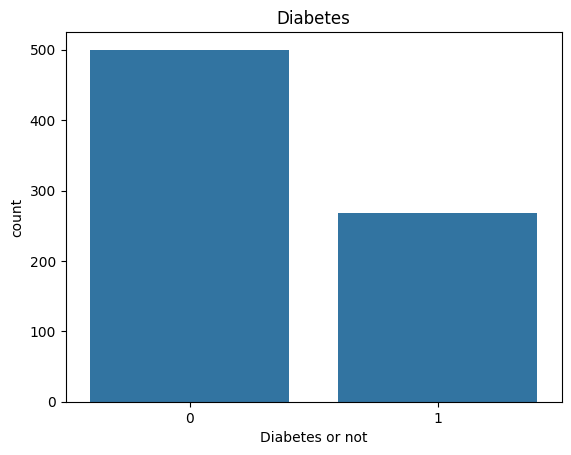

In [3]:
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or not")
plt.ylabel("count")
plt.title("Diabetes")

In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

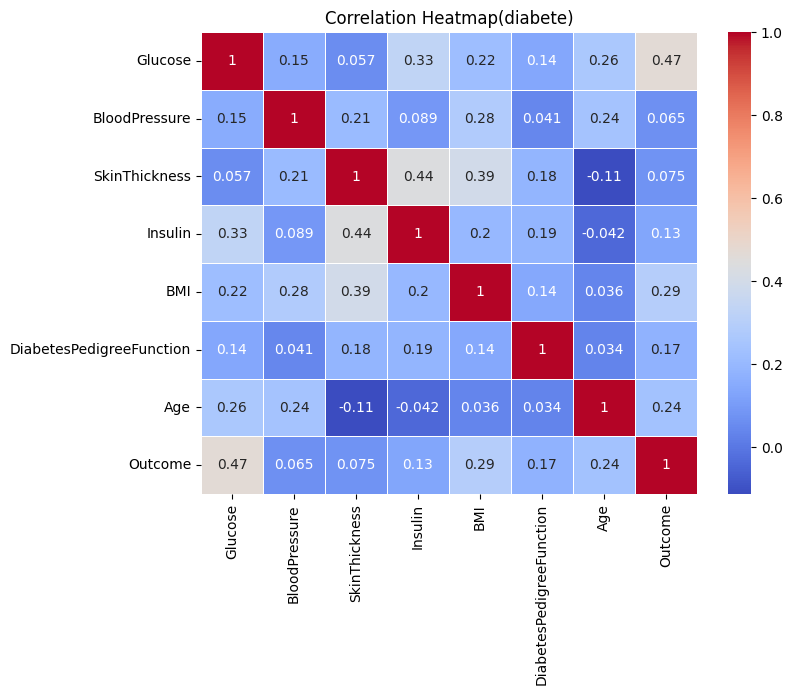

In [6]:
#주어진 데이터를 당뇨 유무에 따라 두 집단으로 분류
# 상관계수 계산
correlation_matrix = df.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap(diabete)')
plt.show()

In [7]:
#각 라벨의 이상치 탐지
from scipy import stats

z_score = np.abs(stats.zscore(df))
print(df.shape)

df = df[(z_score<3).all(axis=1)]
print(df.shape)

(768, 8)
(692, 8)


In [8]:
print(df.shape)

(692, 8)


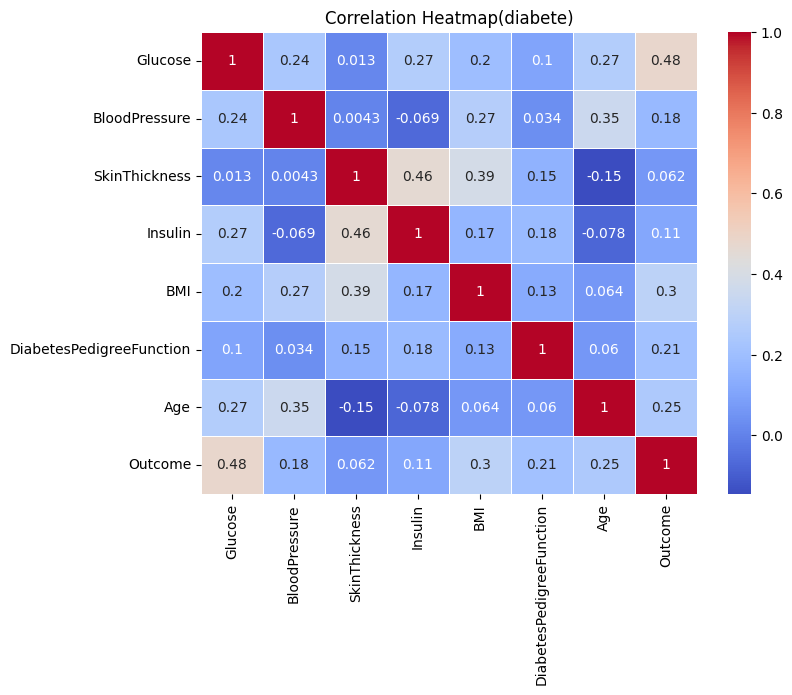

In [9]:
# 상관계수 계산
correlation_matrix = df.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap(diabete)')
plt.show()

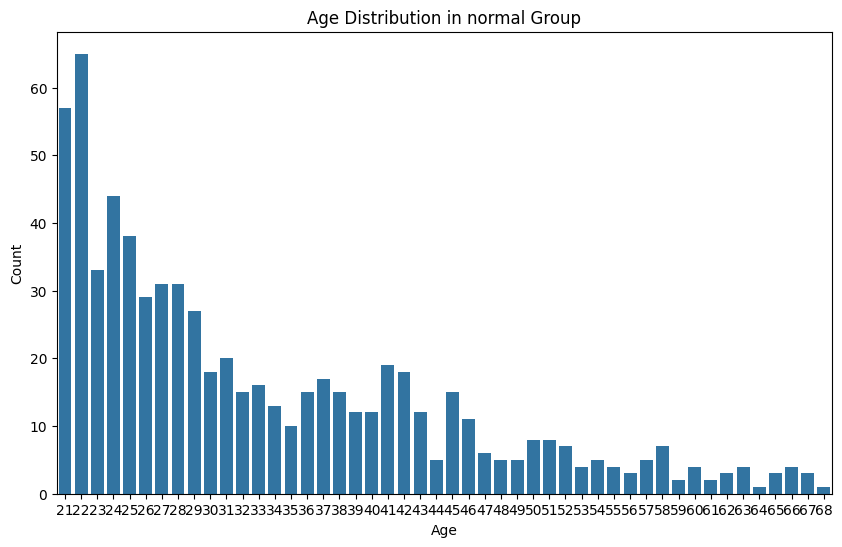

In [10]:
# diabete 집단 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in normal Group")
plt.show() 

In [11]:
df_other = df.drop('Outcome',axis=1)
df_other

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30


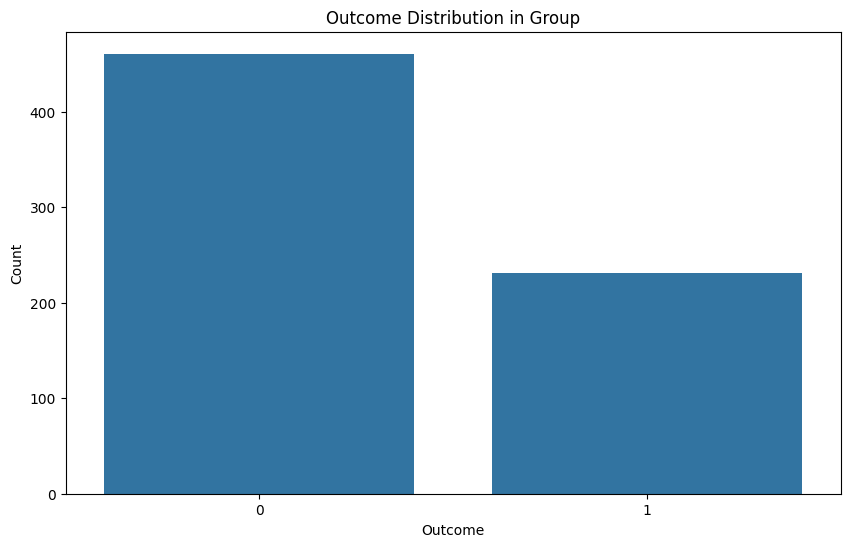

In [12]:
# outcome 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Outcome Distribution in Group")
plt.show() 

In [13]:
df = df.drop('SkinThickness',axis=1)
df = df.drop('Insulin',axis=1)

In [14]:
# data 준비
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']

In [15]:
print(df_y.value_counts())
print(df_y.unique)

Outcome
0    461
1    231
Name: count, dtype: int64
<bound method Series.unique of Pregnancies
6     1
1     0
8     1
1     0
5     0
     ..
10    0
2     0
5     0
1     1
1     0
Name: Outcome, Length: 692, dtype: int64>


In [16]:
df_X = df_X.values
df_y = df_y.values

# 데이터셋 나누기
from sklearn.model_selection import train_test_split

df_X_train, df_X_temp, df_y_train, df_y_temp = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42,stratify=df_y
)

df_X_test, df_X_val, df_y_test, df_y_val = train_test_split(
    df_X_temp, df_y_temp, test_size=0.5, random_state=42,stratify=df_y_temp 
)

import numpy as np
from imblearn.over_sampling import SMOTE

# 데이터 증강
df_X_train = df_X_train.reshape(df_X_train.shape[0], -1)

# SMOTE를 사용하여 오버샘플링
sm = SMOTE(random_state=42)
df_X_train, df_y_train = sm.fit_resample(df_X_train, df_y_train)

# 오버샘플링 후 데이터의 shape 출력
print("X_res shape:", df_X_train.shape)
print("y_res shape:", df_y_train.shape)

# 클래스별 샘플 수 출력
y_train_int = df_y_train
unique, counts = np.unique(y_train_int, return_counts=True)
class_counts = dict(zip(unique, counts))
print("클래스별 샘플 수:", class_counts)

# 데이터의 분포가 좀 차이가 나니 MinMaxScaler를 사용하여 스케일링 실시
from sklearn.preprocessing import MinMaxScaler

# 스케일러 생성
scaler_x = MinMaxScaler()

# 훈련 데이터 스케일링
df_X_train_scaled = scaler_x.fit_transform(df_X_train)
df_y_train_scaled = df_y_train.reshape(-1,1)

# 테스트 데이터 스케일링 (훈련 데이터로 fit한 스케일러 사용)
df_X_test_scaled = scaler_x.transform(df_X_test)
df_y_test_scaled = df_y_test.reshape(-1,1)

# 검증 데이터 스케일링
df_X_val_scaled = scaler_x.transform(df_X_val)
df_y_val_scaled = df_y_val.reshape(-1,1)

# 결과 확인
print(df_X_train_scaled[0])
print(df_y_train_scaled[0])
print(df_X_test_scaled[0])
print(df_y_test_scaled[0])
print(df_X_val_scaled[0])
print(df_y_val_scaled[0])

import joblib

# 스케일러 저장
joblib.dump(scaler_x, 'scaler_x.pkl')


X_res shape: (736, 5)
y_res shape: (736,)
클래스별 샘플 수: {0: 368, 1: 368}
[0.49677419 0.43478261 0.59714286 0.58423717 0.04255319]
[0]
[0.67096774 0.45652174 0.44       0.39696312 0.61702128]
[1]
[0.7483871  0.26086957 0.35142857 0.36876356 0.38297872]
[1]


['scaler_x.pkl']

In [17]:
# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(df_X_train_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_X_train_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(df_y_train_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_y_train_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(df_X_test_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_X_test_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(df_y_test_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_y_test_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(df_X_val_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_X_val_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(df_y_val_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_y_val_scaled).sum())


데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0


In [18]:
print(df_X_train_scaled.shape)
print(df_y_train_scaled.shape)
print(df_X_test_scaled.shape)
print(df_y_test_scaled.shape)
print(df_X_val_scaled.shape)
print(df_y_val_scaled.shape)

(736, 5)
(736, 1)
(69, 5)
(69, 1)
(70, 5)
(70, 1)


In [19]:
import numpy as np

# 시퀀스 생성 함수 정의

def create_sequences(data_X, data_y, window_size):
    sequences_X = []
    sequences_y = []
    for i in range(len(data_y) - window_size):
        _X = data_X[i : i + window_size]  # 입력 시퀀스 생성
        _y = data_y[i + window_size]      # 타겟 설정
        sequences_X.append(_X)
        sequences_y.append(_y)
    return np.array(sequences_X), np.array(sequences_y)

# 윈도우 크기 설정
window = 10

# 훈련 데이터 스케일링
df_X_train_scaled = scaler_x.fit_transform(df_X_train)
df_X_test_scaled = scaler_x.transform(df_X_test)
df_X_val_scaled = scaler_x.transform(df_X_val)

# 타겟 데이터 스케일링
df_y_train_scaled = df_y_train
df_y_test_scaled = df_y_test
df_y_val_scaled = df_y_val

# 시퀀스 생성
df_X_train_scaled_3d, df_y_train_scaled_3d = create_sequences(df_X_train_scaled, df_y_train_scaled, window_size=window)
df_X_test_scaled_3d, df_y_test_scaled_3d = create_sequences(df_X_test_scaled, df_y_test_scaled, window_size=window)
df_X_val_scaled_3d, df_y_val_scaled_3d = create_sequences(df_X_val_scaled, df_y_val_scaled, window_size=window)

# Convert labels to integers and reshape to 1D arrays
df_y_train_scaled_3d = df_y_train_scaled_3d.reshape(-1,1)
df_y_test_scaled_3d = df_y_test_scaled_3d.reshape(-1,1)
df_y_val_scaled_3d = df_y_val_scaled_3d.reshape(-1,1)

# 데이터 확인
print(f"Train data shape: {df_X_train_scaled_3d.shape}, {df_y_train_scaled_3d.shape}")
print(f"Test data shape: {df_X_test_scaled_3d.shape}, {df_y_test_scaled_3d.shape}")
print(f"Validation data shape: {df_X_val_scaled_3d.shape}, {df_y_val_scaled_3d.shape}")
print(df_y_train_scaled_3d)

Train data shape: (726, 10, 5), (726, 1)
Test data shape: (59, 10, 5), (59, 1)
Validation data shape: (60, 10, 5), (60, 1)
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [

In [20]:
import numpy as np

# 원-핫 인코딩된 y_train을 정수 레이블로 변환
y_train_int = df_y_train_scaled_3d
y_train_int2 = df_y_test_scaled_3d
y_train_int3 = df_y_val_scaled_3d

# 각 클래스의 샘플 수 확인
unique, counts = np.unique(y_train_int, return_counts=True)
unique2, counts2 = np.unique(y_train_int2, return_counts=True)
unique3, counts3 = np.unique(y_train_int3, return_counts=True)
class_counts = dict(zip(unique, counts))
class_counts2 = dict(zip(unique, counts2))
class_counts3 = dict(zip(unique, counts3))

print("클래스별 샘플 수:", class_counts)
print("클래스별 샘플 수:", class_counts2)
print("클래스별 샘플 수:", class_counts3)

클래스별 샘플 수: {0: 362, 1: 364}
클래스별 샘플 수: {0: 39, 1: 20}
클래스별 샘플 수: {0: 40, 1: 20}


In [21]:
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(df_y_train_scaled_3d),
                                     y=df_y_train_scaled_3d.flatten())

class_weight_dict = dict(enumerate(class_weights))

print(f"Class weights: {class_weight_dict}")

Class weights: {0: 1.0027624309392265, 1: 0.9972527472527473}


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 16)             256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 16)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 16)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 1, 32)             0

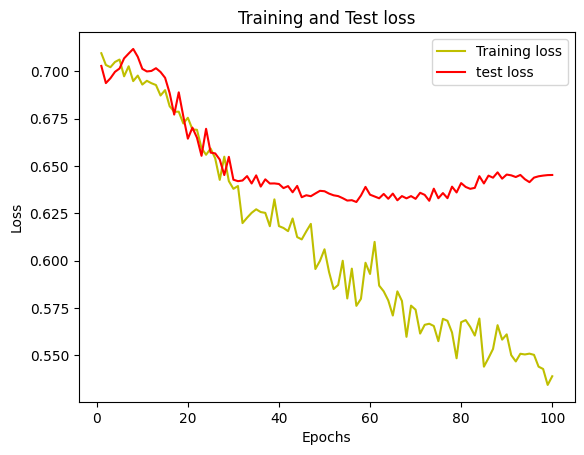

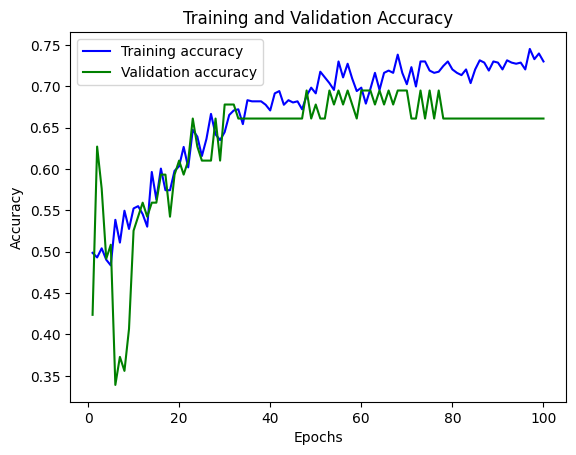

2/2 [==============================] - 0s 9ms/step
[[0.29628304]
 [0.31527176]
 [0.32754087]
 [0.3454715 ]
 [0.3564193 ]
 [0.38071004]
 [0.45097697]
 [0.49064407]
 [0.37656572]
 [0.38018718]
 [0.33681056]
 [0.3414159 ]
 [0.32957548]
 [0.318089  ]
 [0.31756258]
 [0.29893214]
 [0.3175865 ]
 [0.31810006]
 [0.34359944]
 [0.3096357 ]
 [0.32718545]
 [0.29323447]
 [0.34345642]
 [0.33480844]
 [0.3824552 ]
 [0.38451067]
 [0.41844165]
 [0.601374  ]
 [0.56468135]
 [0.5838474 ]
 [0.64276916]
 [0.41036856]
 [0.37198618]
 [0.31623644]
 [0.3369991 ]
 [0.32607692]
 [0.3379865 ]
 [0.35082617]
 [0.34549832]
 [0.3414152 ]
 [0.31327555]
 [0.30533102]
 [0.30903602]
 [0.3386032 ]
 [0.33641207]
 [0.33410108]
 [0.33627596]
 [0.3252838 ]
 [0.3494104 ]
 [0.3429392 ]
 [0.32893193]
 [0.31013915]
 [0.29693794]
 [0.27935407]
 [0.26221043]
 [0.31373245]
 [0.26863772]
 [0.27535996]
 [0.28354517]
 [0.2803642 ]]
Validation acc: 0.6610169410705566


INFO:tensorflow:Assets written to: base_model\assets


INFO:tensorflow:Assets written to: base_model\assets


In [22]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import joblib
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split


#early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# model create, compile 및 fit
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(df_X_train_scaled_3d.shape[1], df_X_train_scaled_3d.shape[2]), kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3)),  # Dropout 추가
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


# 모델 학습 (class_weight 추가)
history = model.fit(df_X_train_scaled_3d,
                    df_y_train_scaled_3d,
                    epochs=100,
                    batch_size=64,
                    validation_data=(df_X_test_scaled_3d, df_y_test_scaled_3d),
                    #callbacks=[early_stopping],
                    #class_weight=class_weight_dict
                    )  # 클래스 가중치 적용

# 모델 평가
loss, acc = model.evaluate(df_X_test_scaled_3d, df_y_test_scaled_3d)

# 손실 그래프 시각화
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, test_loss, 'r', label='test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화

epochs = range(1, len(loss) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델 예측 수행
pred = model.predict(df_X_val_scaled_3d)

# 예측값 출력
print(pred)

# 검증 정확도 출력
print(f'Validation acc: {acc}')

# 모델 저장
model.save('base_model')


다른 데이터셋으로 돌려보기

In [24]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/akasa/Downloads/abalone.csv',index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

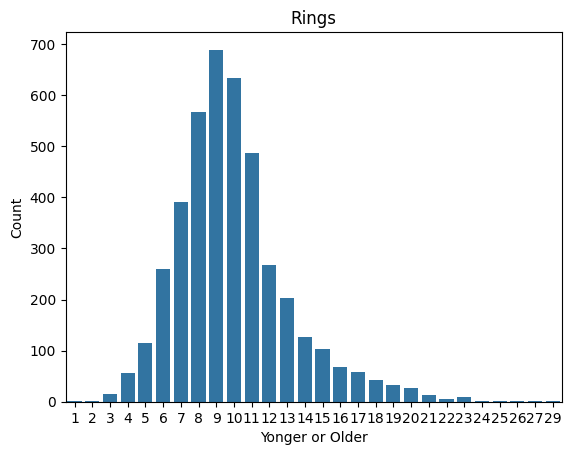

In [25]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [26]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

# normal 데이터로 모델 불러와서 평가해보기

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Rings 값이 3부터 23 사이인 데이터만 필터링
data = df[(df['Rings'] >= 3) & (df['Rings'] <= 23)]

# Rings의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_rings = sorted(data['Rings'].unique())  # 고유한 값들을 정렬
encoding_map = {ring: idx for idx, ring in enumerate(unique_rings)}  # 재매핑

# 인코딩 적용
df['Rings'] =data['Rings'].map(encoding_map)

# 결과 출력
print(df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                 
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                         
0             0.1010       

Text(0.5, 1.0, 'Rings')

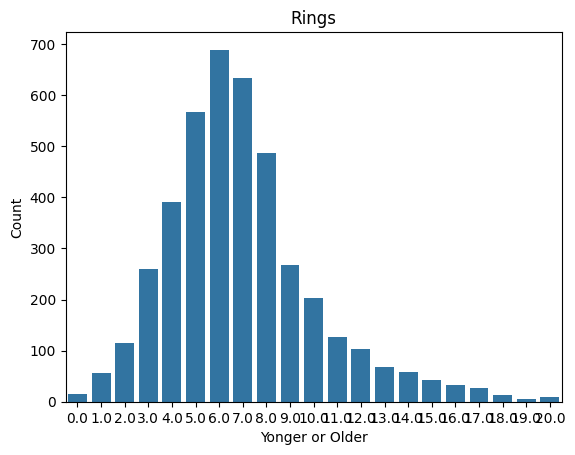

In [29]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [30]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             9
dtype: int64

In [31]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [32]:
import tensorflow as tf

#sex label encoding 1(label encoding)
target_label = df['Sex']
target_label.dtype
mapping = {'M':0, 'F':1,'I':2}
df['Sex'] = target_label.map(mapping)

#target 데이터 옮기기
rings = df['Rings']
df_no_ring = df.drop('Rings',axis=1)
df_no_ring.dropna()

#maxminscale을 위한 데이터 분리
one_hot = df['Sex']
df_other = df_no_ring.drop('Sex',axis=1)
df_other.head()

#Sex label encoding 2(one-hot encoding)
#one_hot = pd.get_dummies(df['Sex'],prefix='Sex')
#df = df.drop('Sex',axis=1)
#df

C:\Users\akasa\AppData\Local\Temp\ipykernel_13184\2969370299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = target_label.map(mapping)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [33]:
import pandas as pd
import tensorflow as tf

# Sex 열의 고유 값 확인
print(df['Sex'].unique())  # 값들이 예상대로 'M', 'F', 'I'인지 확인

# One-Hot Encoding 적용
df_one_hot = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

# 생성된 열들 확인
print(df_one_hot.columns)  # One-Hot 인코딩이 정상적으로 되었는지 확인

# target 데이터 이동
rings = df['Rings'].copy()
df_no_ring = df.drop('Rings', axis=1).copy()
df_no_ring.dropna(inplace=True)

# One-Hot 인코딩된 Sex 데이터 분리
one_hot = df_one_hot.filter(regex='Sex_').copy()  # Sex로 시작하는 모든 열 추출

# Sex 열을 제외한 나머지 데이터
df_other = df_no_ring.drop(['Sex'], axis=1, errors='ignore').copy()
df_other.head()


[0 1 2]
Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_0', 'Sex_1', 'Sex_2'],
      dtype='object')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [34]:
one_hot

,Sex_0,Sex_1,Sex_2
id,,,
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True
...,...,...,...
4172,False,True,False
4173,True,False,False
4174,True,False,False


In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_other)
df_scaled = pd.DataFrame(df_scaled,columns=df_other.columns)
df_scaled = pd.concat([df_scaled,one_hot],axis=1)
df_scaled

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_0,Sex_1,Sex_2
0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707,True,False,False
1,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866,True,False,False
2,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587,False,True,False
3,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697,True,False,False
4,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False


C:\Users\akasa\AppData\Local\Temp\ipykernel_13184\3623901984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rings'] = df['Rings'].apply(lambda x: 0 if x <= 5.0 else (1 if x <= 7.0 else 2))


Text(0.5, 1.0, 'Rings')

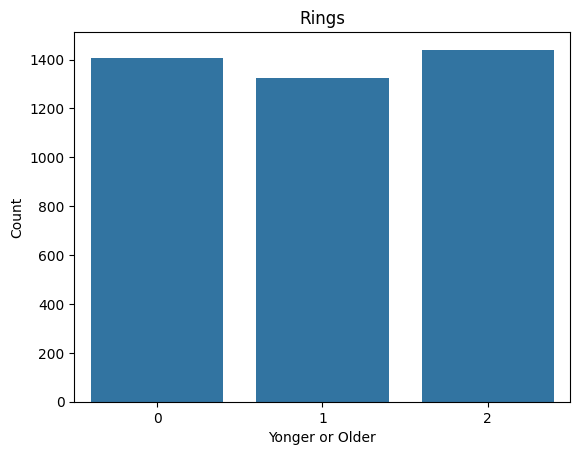

In [36]:
#청년층의 비율을 0.3정도로 잡고 yonger/middle/older 클래스를 나눈다

df['Rings'] = df['Rings'].apply(lambda x: 0 if x <= 5.0 else (1 if x <= 7.0 else 2))
df['Rings']

sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [37]:
df_scaled = pd.concat([df_scaled,df['Rings']],axis=1)
df_scaled

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_0,Sex_1,Sex_2,Rings
0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707,True,False,False,2.0
1,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866,True,False,False,0.0
2,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587,False,True,False,1.0
3,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697,True,False,False,1.0
4,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896,False,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,2.0
4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,1.0
4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,1.0
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,1.0


In [38]:
import numpy as np

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(df_scaled.isna().sum())

# Inf 값 확인 (숫자형 열에만 적용)
print("데이터에 무한대 값이 있는지 확인:")
numeric_cols = df_scaled.select_dtypes(include=[np.number])  # 숫자형 열만 선택
print(np.isinf(numeric_cols).sum())


데이터에 NaN이 있는지 확인:
Length            9
Diameter          9
Height            9
Whole_weight      9
Shucked_weight    9
Viscera_weight    9
Shell_weight      9
Sex_0             9
Sex_1             9
Sex_2             9
Rings             9
dtype: int64
데이터에 무한대 값이 있는지 확인:
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [39]:
df_scaled = df_scaled.dropna()
df_scaled.isnull().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Sex_0             0
Sex_1             0
Sex_2             0
Rings             0
dtype: int64

Text(0.5, 1.0, 'Rings')

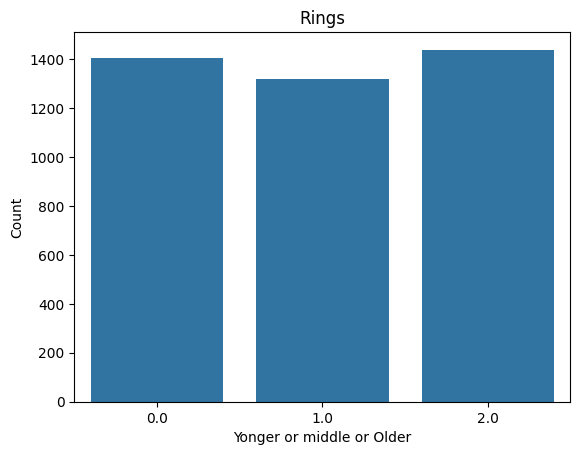

In [40]:
sns.countplot(data = df_scaled, x="Rings")
plt.xlabel("Yonger or middle or Older")
plt.ylabel("Count")
plt.title("Rings")

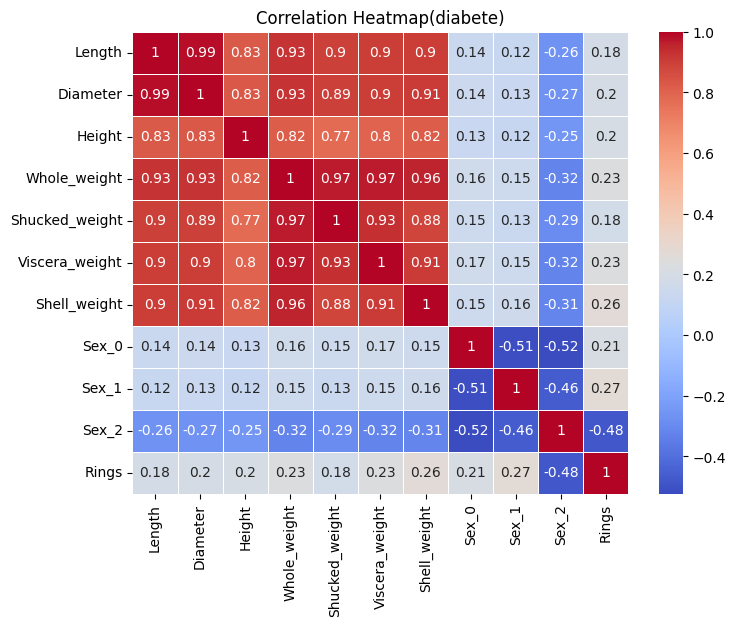

In [41]:
#주어진 데이터를 당뇨 유무에 따라 두 집단으로 분류
# 상관계수 계산
correlation_matrix = df_scaled.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap(diabete)')
plt.show()

In [42]:
X = df_scaled.drop('Sex_0',axis=1)
X = X.drop('Sex_1',axis=1)
X = X.drop('Sex_2',axis=1)
X = X.drop('Shucked_weight',axis=1)
X = X.drop('Length',axis=1)


X = X.drop('Rings',axis=1).values
y = df_scaled['Rings'].values
print(X)
print(y)
print(X.shape)
print(y.shape)

[[0.49107143 0.0840708  0.17959184 0.1323239  0.14670659]
 [0.3125     0.07964602 0.0771961  0.06319947 0.06686627]
 [0.58928571 0.11946903 0.23744454 0.18564845 0.20658683]
 ...
 [0.6875     0.18141593 0.41455191 0.37788018 0.30439122]
 [0.70535714 0.13274336 0.38562555 0.34298881 0.29241517]
 [0.83035714 0.17256637 0.68873114 0.49506254 0.49101796]]
[2. 0. 1. ... 0. 1. 1.]
(4159, 5)
(4159,)


In [43]:
from sklearn.model_selection import train_test_split
import numpy as np

# 전체 데이터셋의 클래스 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(f"전체 데이터셋 클래스 분포: {dict(zip(unique, counts))}")

# 데이터를 train, test, validation으로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)  # train 60%, 나머지 40%는 test/val
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # 나머지 40%에서 test 50%, val 50%

# 각 분할된 데이터셋의 클래스 분포 확인
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_val, counts_val = np.unique(y_val, return_counts=True)

print(f"Train 클래스 분포: {dict(zip(unique_train, counts_train))}")
print(f"Test 클래스 분포: {dict(zip(unique_test, counts_test))}")
print(f"Val 클래스 분포: {dict(zip(unique_val, counts_val))}")


전체 데이터셋 클래스 분포: {0.0: 1403, 1.0: 1318, 2.0: 1438}
Train 클래스 분포: {0.0: 842, 1.0: 791, 2.0: 862}
Test 클래스 분포: {0.0: 280, 1.0: 264, 2.0: 288}
Val 클래스 분포: {0.0: 281, 1.0: 263, 2.0: 288}


In [44]:
from tensorflow.keras.utils import to_categorical

# 시퀀스 데이터 생성 함수 정의
def create_sequences(data_X, data_y, window_size):
    sequences_X = []
    sequences_y = []
    for i in range(len(data_y) - window_size):
        _X = data_X[i : i + window_size]  # 시퀀스 생성
        _y = data_y[i + window_size]      # 타겟
        sequences_X.append(_X)
        sequences_y.append(_y)
    return np.array(sequences_X), np.array(sequences_y)

# 시퀀스 길이 (window_size) 설정
window_size = 10

# train, test, val 데이터에 대해 시퀀스 생성
abalone_X_train_scaled, y_train_scaled = create_sequences(X_train, y_train, window_size)
abalone_X_test_scaled, y_test_scaled = create_sequences(X_test, y_test, window_size)
abalone_X_val_scaled, y_val_scaled = create_sequences(X_val, y_val, window_size)

# 타겟 데이터 원핫 인코딩 (3개의 클래스에 맞춰 인코딩)
abalone_y_train_scaled = to_categorical(y_train_scaled, num_classes=3)
abalone_y_test_scaled = to_categorical(y_test_scaled, num_classes=3)
abalone_y_val_scaled = to_categorical(y_val_scaled, num_classes=3)

print(f"Train 3D shape: {abalone_X_train_scaled.shape}, {abalone_y_train_scaled.shape}")
print(f"Test 3D shape: {abalone_X_test_scaled.shape}, {abalone_y_test_scaled.shape}")
print(f"Val 3D shape: {abalone_X_val_scaled.shape}, {abalone_y_val_scaled.shape}")


Train 3D shape: (2485, 10, 5), (2485, 3)
Test 3D shape: (822, 10, 5), (822, 3)
Val 3D shape: (822, 10, 5), (822, 3)


In [45]:
base_loss,base_accuracy=model.evaluate(df_X_train_scaled_3d,df_y_train_scaled_3d)

model_file='base_model'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

23/23 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7466


INFO:tensorflow:Assets written to: base_model\assets


INFO:tensorflow:Assets written to: base_model\assets


model saved at  base_model
Accuracy >74.655646
Base Loss >0.51


In [46]:
from tensorflow.keras.models import load_model

base_model = load_model('base_model')

base_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
base_model.evaluate(df_X_val_scaled_3d,df_y_val_scaled_3d)

2/2 [==============================] - 1s 0s/step - loss: 0.6616 - accuracy: 0.6333


[0.6616266965866089, 0.6333333253860474]

새로운 데이터셋은 다중 분류(클래스 3개로 분류)라 기존의 모델로 평가 불가능(클래스 2개로 분류)

In [47]:
base_model.evaluate(abalone_X_test_scaled,abalone_y_test_scaled)

ValueError: in user code:

    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\akasa\anaconda3\envs\DLA\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 3)).


In [57]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 중간에 완전연결층 추가

# 최종 출력층 추가 (예: 3개의 클래스)
new_model.add(layers.Dense(3, activation='softmax'))

# 모델 컴파일 (다중 클래스 분류)
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1)                 2369      
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,692
Trainable params: 323
Non-trainable params: 2,369
_________________________________________________________________


In [59]:
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(abalone_y_train_scaled),
                                     y=abalone_y_train_scaled.flatten())

class_weight_dict = dict(enumerate(class_weights))

print(f"Class weights: {class_weight_dict}")

Class weights: {0: 0.75, 1: 1.5}


In [ ]:
history2 = new_model.fit(abalone_X_train_scaled, abalone_y_train_scaled, epochs = 100, batch_size = 64, validation_data = (abalone_X_test_scaled, abalone_y_test_scaled), shuffle = True)

new_model.summary()

Epoch 1/100
39/39 [==============================] - 3s 23ms/step - loss: 1.1079 - accuracy: 0.3304 - val_loss: 1.1042 - val_accuracy: 0.3455
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 1.1049 - accuracy: 0.3425 - val_loss: 1.1040 - val_accuracy: 0.3455
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 1.1048 - accuracy: 0.3348 - val_loss: 1.1039 - val_accuracy: 0.3455
Epoch 4/100
39/39 [==============================] - 0s 6ms/step - loss: 1.1049 - accuracy: 0.3457 - val_loss: 1.1038 - val_accuracy: 0.3455
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 1.1046 - accuracy: 0.3445 - val_loss: 1.1038 - val_accuracy: 0.3455
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 1.1045 - accuracy: 0.3457 - val_loss: 1.1037 - val_accuracy: 0.3455
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 1.1042 - accuracy: 0.3324 - val_loss: 1.1037 - val_accuracy: 0.3455
Epoch 8/100


In [ ]:
new_model.evaluate(abalone_X_test_scaled,abalone_y_test_scaled)

미세조정

In [ ]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:

import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
history3 = new_model.fit(abalone_X_train_scaled, abalone_y_train_scaled, epochs = 100, batch_size = 64, validation_data = (abalone_X_test_scaled, abalone_y_test_scaled), shuffle = True)

new_model.summary()

In [ ]:
new_model.evaluate(abalone_X_test_scaled, abalone_y_test_scaled)